In [275]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [276]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

In [277]:
def extract_at(s):
    s = s.replace("@"," @").replace("\n"," ")
    return [item.strip().lower() for item in s.strip().split(" ") if len(item)>0 and item.strip().startswith('@')]

In [278]:
def extract_hash_tags(s):
    s = s.replace("#"," #")
    return set([re.sub(r"#+", "#", k) for k in set([re.sub(r"(\W+)$", "", j, flags = re.UNICODE) for j in set([i for i in s.split() if i.startswith("#")])])])

In [313]:
df = pd.read_csv("chodakowska.csv")
df.sample(n=10)

,id,type,shortcode,comments,ts,likes,is_video,video_views,txt,url
2459,1735689973112702319,GraphSidecar,BgWaNWflwVv,324,2018-03-15 17:13:10,12404,False,0,OLEJ KOKOSOWY 🥥kontynuujemy z Martą Mieloszyk ...,https://scontent-waw1-1.cdninstagram.com/v/t51...
5298,716464652532022264,GraphImage,nxZM40S3v4,74,2014-05-09 11:54:23,6485,False,0,#happy#since#ever😜😝😛22 years ago 😉,https://scontent-waw1-1.cdninstagram.com/v/t51...
1664,1968845095635302980,GraphSidecar,BtSvi7fHLpE,122,2019-01-31 09:50:46,6705,False,0,"CO SIĘ Z TOBĄ DZIEJE, KIEDY W GŁOWIE I CIELE S...",https://scontent-waw1-1.cdninstagram.com/v/t51...
2119,1842279195881166597,GraphImage,BmRFyr3ltcF,325,2018-08-09 19:46:55,41855,False,0,Jestem taka jak Ty.. czy tego chcesz czy nie.....,https://scontent-waw1-1.cdninstagram.com/v/t51...
3966,1110063423649708149,GraphImage,9nvM1sy3h1,63,2015-11-03 12:24:53,17836,False,0,Zapachy...smaki..kolory .. Tutaj je sie wszyst...,https://scontent-waw1-1.cdninstagram.com/v/t51...
4350,1037888016268098397,GraphVideo,5nUabeS3td,468,2015-07-26 23:25:14,17003,True,0,Boszzzzzz.... Moze i talentu do tańca brak - z...,https://scontent-waw1-1.cdninstagram.com/v/t51...
3838,1148035152875321534,GraphImage,_uo-OUy3i-,64,2015-12-25 21:47:56,18158,False,0,SUPER POWER TEAM 💪🏼🔥❤️ #love #health #wisdom #...,https://scontent-waw1-1.cdninstagram.com/v/t51...
4539,1002229471191464889,GraphVideo,3oomTdy3u5,369,2015-06-07 18:38:04,14414,True,0,W razie gdybys sie dzis nudziła 😁😁😁 3 cwiczeni...,https://scontent-waw1-1.cdninstagram.com/v/t51...
434,2256098518435239332,GraphImage,B9PRaYxnhWk,67,2020-03-02 17:52:03,10285,False,0,Bierz kartkę i długopis w rękę lub otwieraj ks...,https://scontent-waw1-1.cdninstagram.com/v/t51...
1584,1982022800457797396,GraphSidecar,BuBjzxeAw8U,185,2019-02-18 14:12:31,26934,False,0,Rodzina PONAD WSZYSTKO ❣️Tym razem na Tydzień ...,https://scontent-waw1-1.cdninstagram.com/v/t51...


## Suma komentarzy

In [280]:
df.comments.sum()

1573926

In [281]:
df["ts_day"] = df.ts.str[:10]
df.txt.fillna("", inplace=True)
df["ts_h"] = df.ts.str[11:13] # wyznaczenie godziny postu

## Daty zamieszczanie postów

In [282]:
dfg_dt = df.groupby('ts_day').size().sort_index()

In [312]:
trace0 = go.Scatter(
   x = dfg_dt.index,
   y = dfg_dt.values,
   mode='markers',
   name='Oryg'
)

data = [trace0]
layout = go.Layout(title = "Daty zamieszczania postów", xaxis = {'title':'Data'}, yaxis = {'title':'Liczba postów'}, width=1000, height=800)
fig = go.Figure(data = data, layout = layout)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

iplot(fig)

## Rodzaj zamieszczanego contentu

In [284]:
df_content = df.type.value_counts().to_frame()
df_content.index = ['Photos','Slideshow','Video']
df_content.columns = ['Qnty']
df_content

,Qnty
Photos,4358
Slideshow,624
Video,540


## Top posty z największą liczbą komentrarzy

In [285]:
df.sort_values('comments', ascending=False).head(5)

,id,type,shortcode,comments,ts,likes,is_video,video_views,txt,url,ts_day,ts_h
294,2283665668423133166,GraphImage,B-xNdN4Hafu,16562,2020-04-09 19:43:03,61017,False,0,"Jeśli sie na to piszesz W CIEMNO, stuknij palc...",https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-04-09,19
1407,2010802300479473154,GraphSidecar,BvnzgnhngYC,13105,2019-03-30 07:12:15,86391,False,0,LET ME INTRODUCE YOU TO MY swimwear brand .. a...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2019-03-30,07
85,2339229178380772037,GraphImage,CB2nItBnWLF,8679,2020-06-25 11:37:50,40120,False,0,FAJTERKO 💪🏻 RUSZAMY 🐎💨 Przed Tobą DARMOWA I K...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-06-25,11
175,2312008202194914069,GraphImage,CAV5zXZngsV,7087,2020-05-18 22:14:36,40824,False,0,"Jeśli w TO WCHODZISZ, stuknij palcem DWA RAZY...",https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-05-18,22
2510,1723547200393666182,GraphImage,BfrRQwJFV6G,6284,2018-02-26 23:07:38,76977,False,0,"Upssss... wybacz, ze obracam się tyłem... ale ...",https://scontent-waw1-1.cdninstagram.com/v/t51...,2018-02-26,23


## Top posty z największą liczbą polubień

In [286]:
df.sort_values('likes', ascending=False).head(5)

,id,type,shortcode,comments,ts,likes,is_video,video_views,txt,url,ts_day,ts_h
1831,1940629179370104865,GraphImage,Bruf_TtHOgh,1589,2018-12-23 11:30:47,108748,False,0,Miałam napisać tylko WESOŁYCH ŚWIĄT po raz dru...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2018-12-23,11
1455,2002985153531269104,GraphImage,BvMCGKGnM_w,1905,2019-03-19 12:20:58,95479,False,0,Ostre cięcie na wiosnę 💇🏼‍♀️ #newchapter,https://scontent-waw1-1.cdninstagram.com/v/t51...,2019-03-19,12
1993,1887207827996712880,GraphImage,BowtYVNFJ-w,1664,2018-10-10 19:32:06,95198,False,0,Prawdziwe KOBIETY poprawiają nawzajem swoje ko...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2018-10-10,19
613,2216762936873872489,GraphImage,B7DhiVrnmxp,1226,2020-01-08 11:19:16,88466,False,0,Moje ulubione nasze zdjęcie ❤️,https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-01-08,11
1769,1953639018576914355,GraphSidecar,BscuFYpnqez,1127,2019-01-10 10:19:01,88133,False,0,JAAAAAASNY GWINT 😱Zapomniałam rękawiczek 🤦🏼‍♀️...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2019-01-10,10


## Top posty typu video z największą liczbą odtworzeń

In [287]:
df[df.is_video==True].sort_values('comments', ascending=False).head(5)

,id,type,shortcode,comments,ts,likes,is_video,video_views,txt,url,ts_day,ts_h
77,2342351532707308170,GraphVideo,CCBtE8GHGKK,4284,2020-06-29 19:01:47,23552,True,321496,Jeśli byłaś dziś na LAJFIE.. jeśli bierzesz ud...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-06-29,19
1116,2075729119858781304,GraphVideo,BzOeKMHHex4,2620,2019-06-27 22:11:01,9370,True,208446,Ale jestem PODEKSCYTOWANA 🤩🤩🤩TO STĄD TW MOTYLE...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2019-06-27,22
241,2295997803666491081,GraphVideo,B_dBdZ0nkbJ,2192,2020-04-26 20:11:35,33870,True,428192,NIESPODZIANKA DLA NAJMŁODSZYCH 🕷🕸\nKochana MAM...,https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-04-26,20
70,2344521720550880277,GraphVideo,CCJahVBn3QV,1822,2020-07-02 18:53:36,18926,True,347851,"Jeśli byłaś dziś i poczułaś CUDNIE DUPSKO, zos...",https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-07-02,18
592,2221390782497868766,GraphVideo,B7T9yWyHMve,1802,2020-01-14 20:35:39,41822,True,487952,,https://scontent-waw1-1.cdninstagram.com/v/t51...,2020-01-14,20


## Najpopularniejsze hashtagi

In [288]:
rows = df.txt.apply(extract_hash_tags).to_list()

In [289]:
hastags = []
for row in rows:
    for item in row:
        if len(item)>0:
            hastags.append(item.lower())

In [290]:
df_hashtags = pd.DataFrame(hastags, columns=['hashtag'])
df_hashtags.groupby('hashtag').size().sort_values(ascending=False).head(20).to_frame().reset_index()

,hashtag,0
0,#chodagang,1208
1,#misjachoda,855
2,#training,624
3,#fajterka,464
4,#workout,455
5,#fitness,427
6,#motivation,397
7,#bediet,392
8,#fitbody,326
9,#beactivetv,282


## Chmura hashtagów

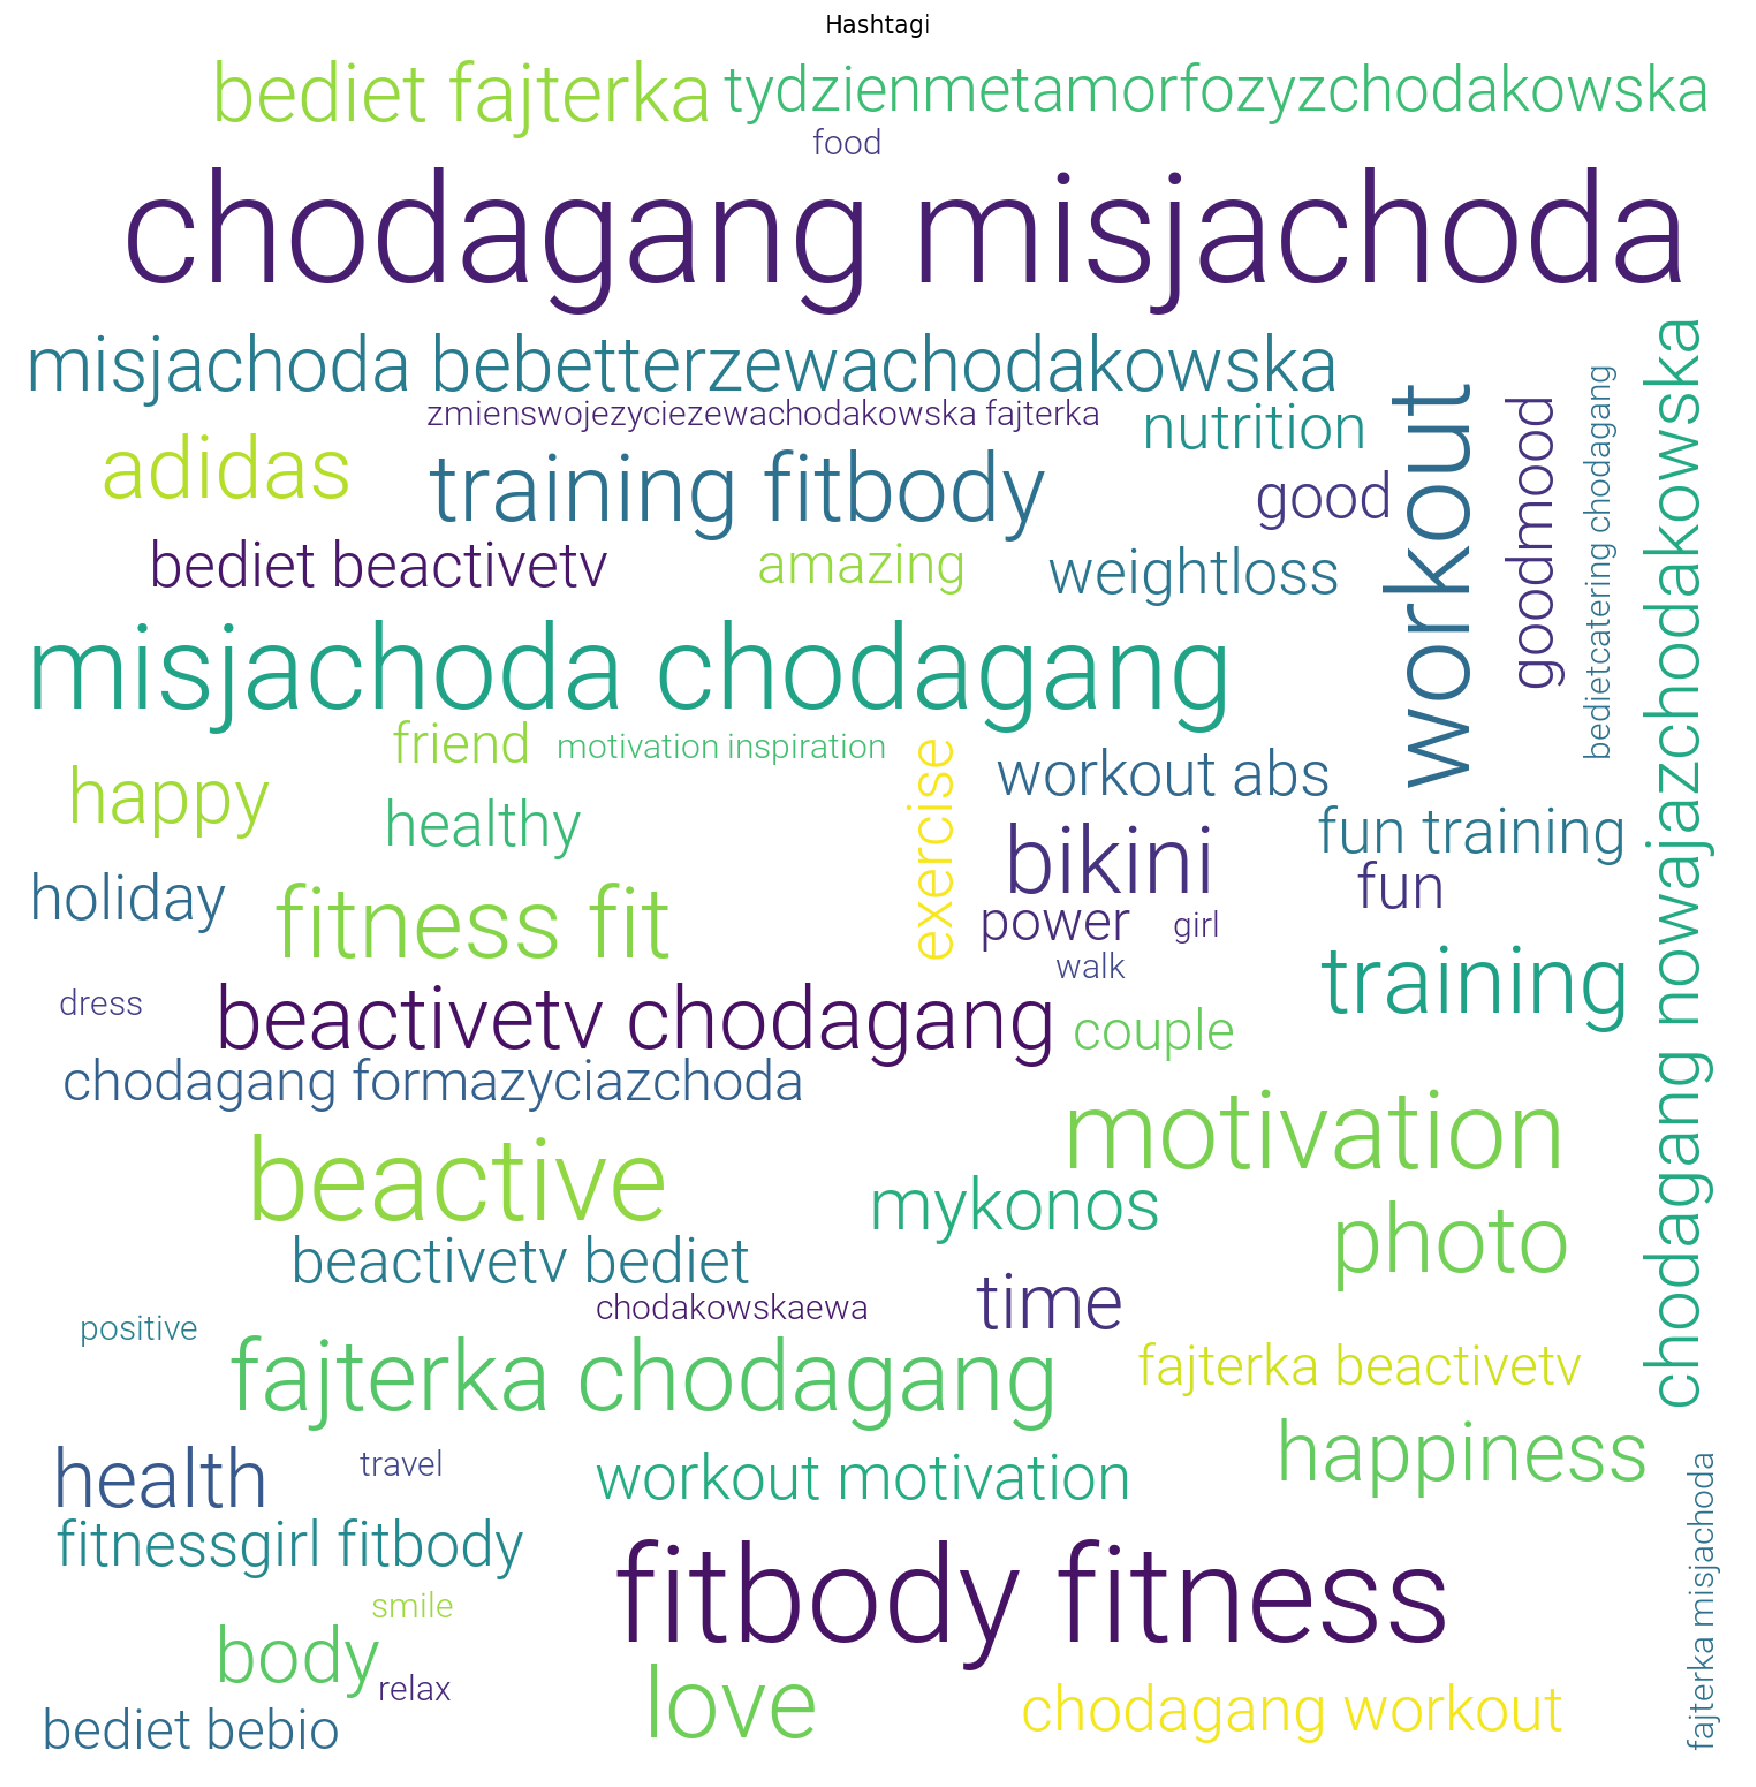

In [305]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', font_path='Roboto-Light.ttf', margin=10, scale=1.5,
                min_font_size = 20).generate(" ".join(df_hashtags.hashtag.to_list())) 
  
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Hashtagi')

plt.show() 

## Godzina zamieszczania postów

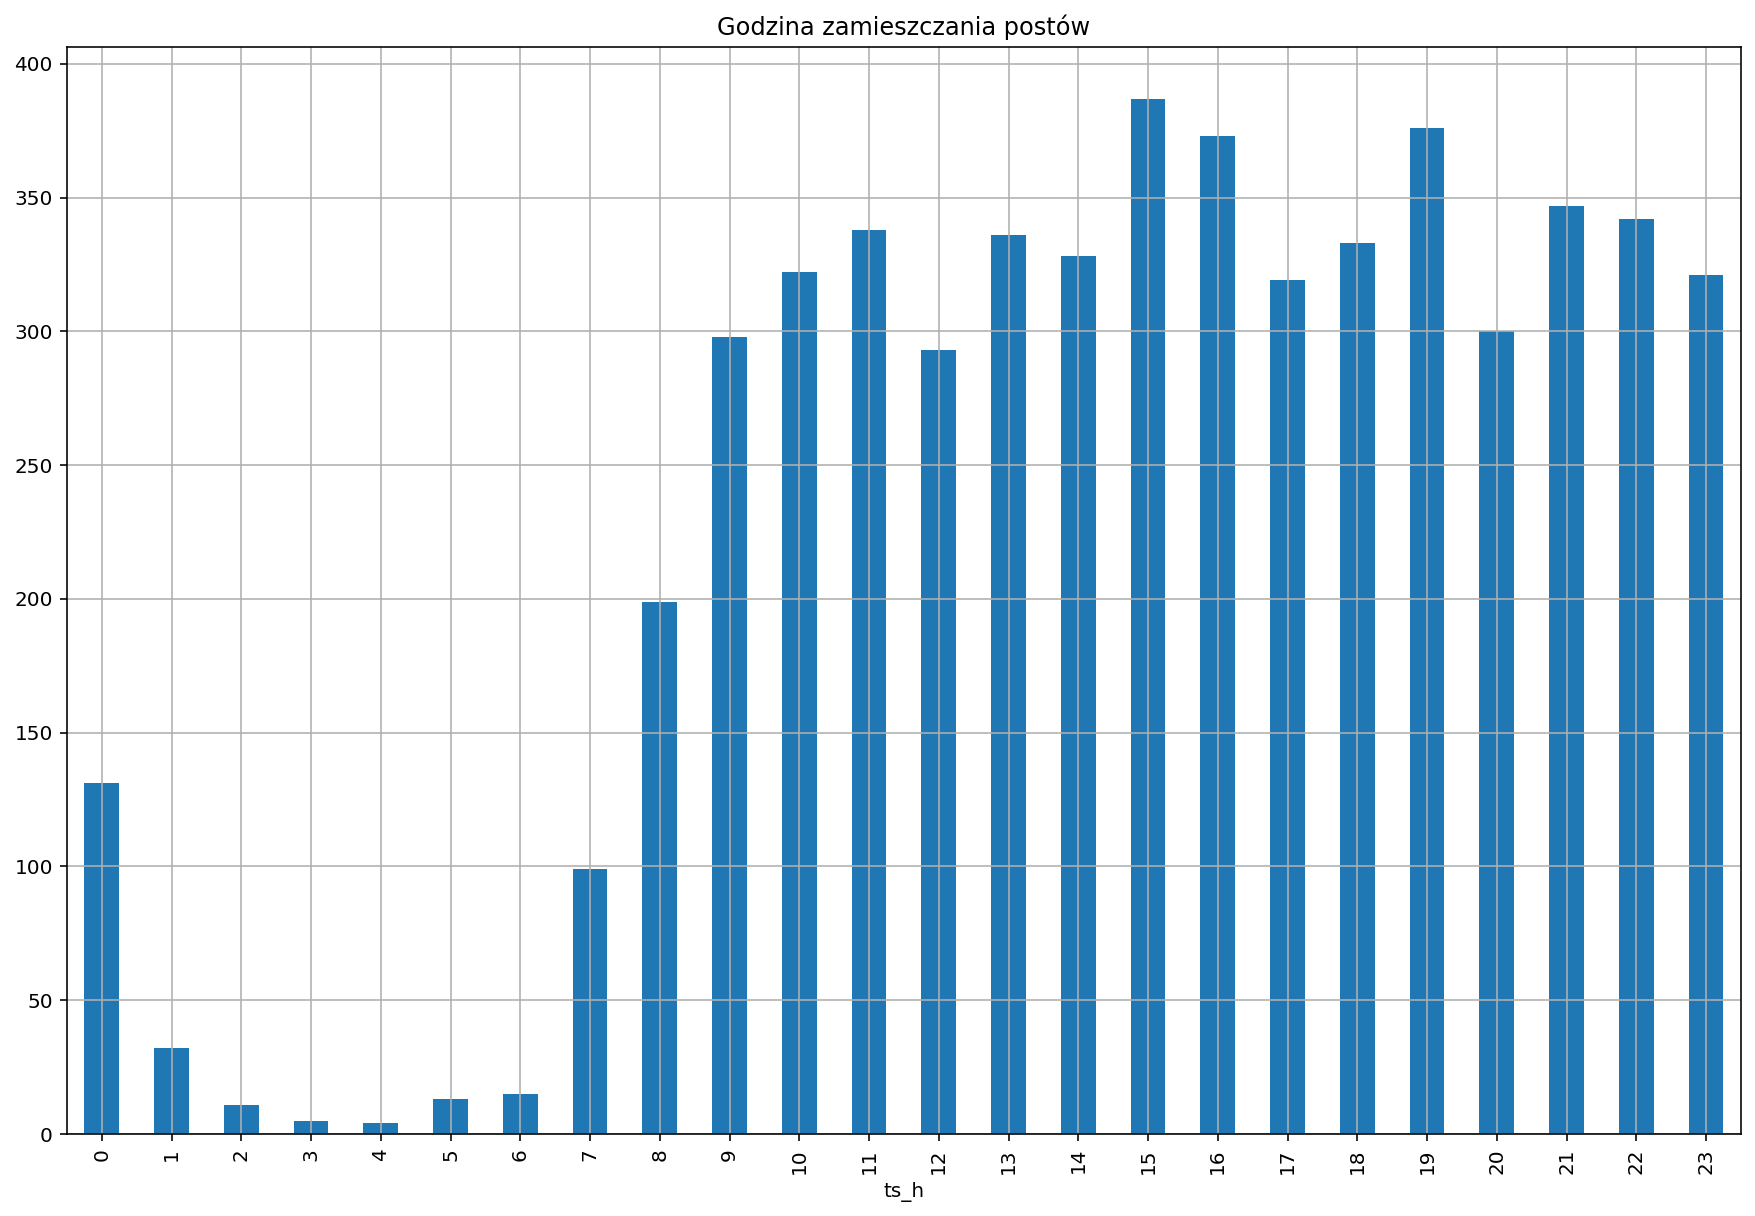

In [309]:
df.groupby('ts_h').size().sort_index().plot(figsize=(15,10), grid=True, kind='bar')
plt.xticks(range(0,24), labels=range(0,24))
plt.title('Godzina zamieszczania postów')
plt.show()

## Liczba komentarzy vs godzina publikacji postów

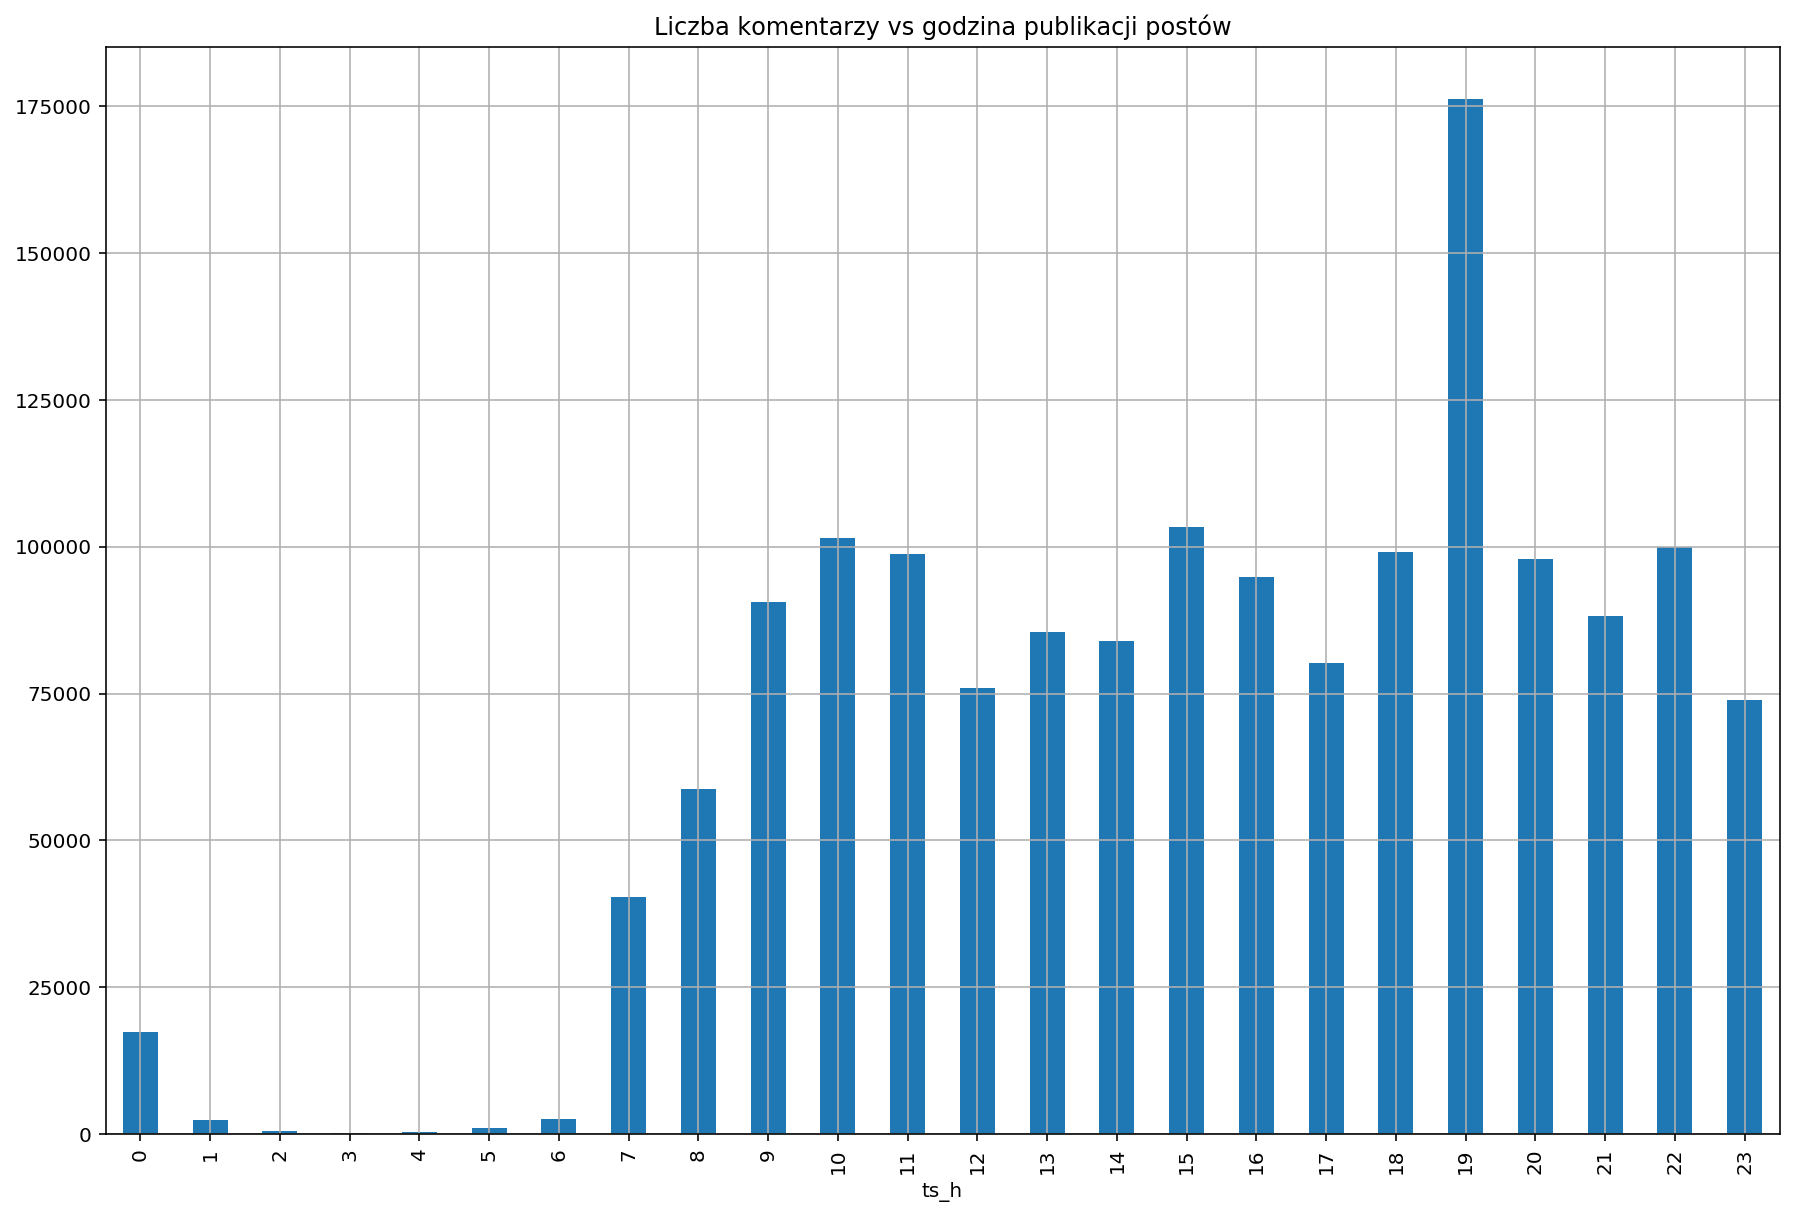

In [308]:
ax = df.groupby('ts_h')["comments"].sum().sort_index().plot(figsize=(15,10), grid=True, kind='bar')
plt.xticks(range(0,24), labels=range(0,24))
plt.title("Liczba komentarzy vs godzina publikacji postów")
plt.show()

## Najczęstsze wzmianki w postach

In [294]:
result = []
df1 = df[df.txt.str.contains("@")]
items = df1.txt.apply(extract_at).to_list()
for item in items:
    result.extend(item)

In [295]:
df_at = pd.DataFrame(result, columns=['at'])
df_at.groupby('at').size().sort_values(ascending=False).head(20).to_frame().reset_index()

,at,0
0,@kavoukis,369
1,@missionswim,198
2,@beraw_ewachodakowska,176
3,@bediet_catering,155
4,@tvbeactive,109
5,@marta.mizera,103
6,@adidaswomen,97
7,@bebiocosmetics,95
8,@mrs_kitchen_fairy,93
9,@adidas_pl,92


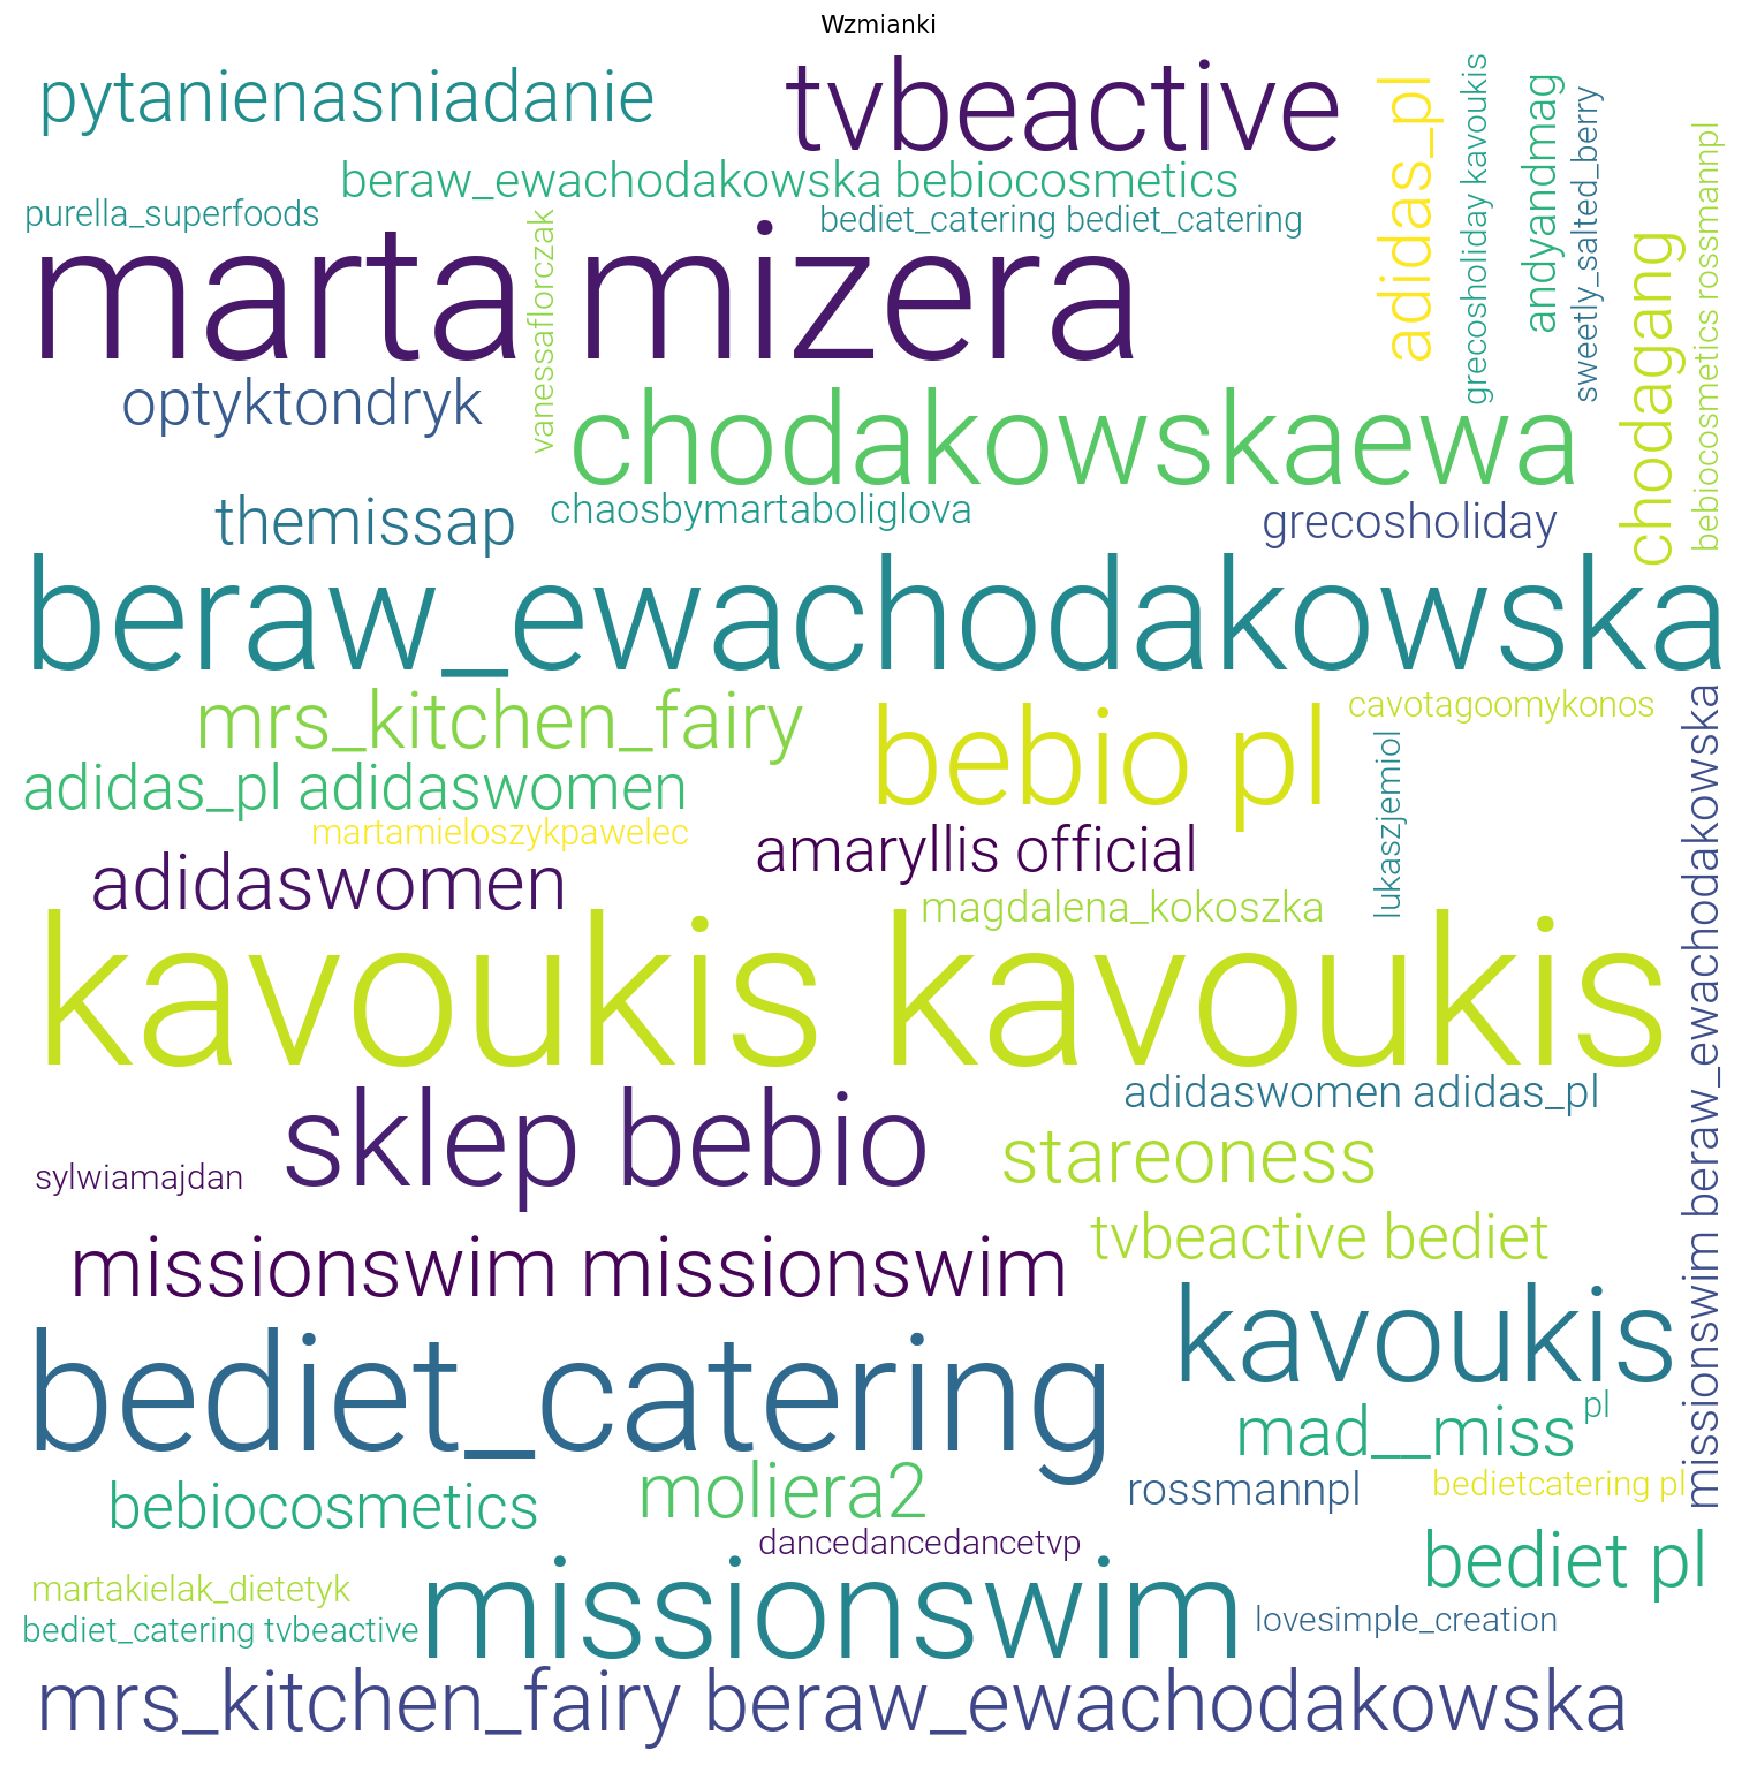

In [304]:
wordcloud = WordCloud(width = 1000, height = 1000, font_path='Roboto-Light.ttf', margin=10, scale=1.5,
                background_color ='white', 
                min_font_size = 20).generate(" ".join(result)) 
  
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wzmianki')
  
plt.show() 